In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn import datasets

In [383]:
data = pd.read_csv("/Users/mustafacitak/Desktop/Python/DL/Titanic-Dataset.csv", na_values =['NaN', 'N/A', '-', '?'])

print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [384]:
print(data.dtypes)
print("\n")
print(data.isnull().sum())

#print(np.isnan(data).sum())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [385]:
# "Cabin" sütununu sil
#data.drop('Cabin', axis=1, inplace=True)
#data.drop('Name', axis=1, inplace=True)
#data.drop('Ticket', axis=1, inplace=True)

columns_to_drop = ['Cabin', 'Name', 'Ticket']
data.drop(columns_to_drop, axis=1, inplace=True)


# "Age" sütununu verinin ortalama değeri ile doldur
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)

data.dropna(subset=['Embarked'], inplace=True)

# Veriyi kontrol etmek için ilk birkaç satırı yazdır
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [386]:
data.shape

(889, 9)

In [387]:
print(data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [388]:
# Sex sütununu dönüştür
data['Sex'] = data['Sex'].replace({'male': 0, 'female': 1})

# Embarked sütununu dönüştür
data['Embarked'] = data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

In [389]:
print(data.head())



   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500         0
1            2         1       1    1  38.0      1      0  71.2833         1
2            3         1       3    1  26.0      0      0   7.9250         0
3            4         1       1    1  35.0      1      0  53.1000         0
4            5         0       3    0  35.0      0      0   8.0500         0


In [390]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [391]:
#sınıf özniteliğinin ayrılması
X = data.drop('Sex', axis=1)  # 'Sex' sütununu dışarıda bırakarak X'i oluşturun
y = data['Sex']  # 'Sex' sütunu y değişkeni olarak belirleyin

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,)

In [393]:
model = Sequential([
    Dense(32, input_shape=(8,), activation='tanh'),
    Dense(64, activation='sigmoid'),
    Dense(1, activation='relu')
])
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 32)                288       
                                                                 
 dense_79 (Dense)            (None, 64)                2112      
                                                                 
 dense_80 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________


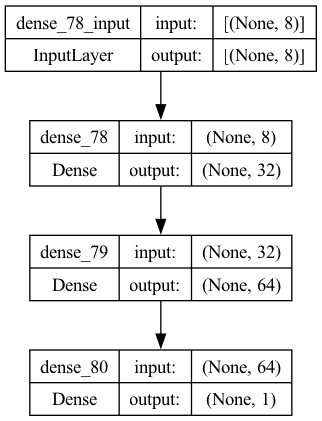

In [394]:
tf.keras.utils.plot_model(
    model, "Titanic-model.png",
    show_shapes=True,
    show_layer_names=True)

In [395]:
model.compile (
loss = "binary_crossentropy",
optimizer = "adam",
metrics = ["accuracy"])

In [396]:
history = model.fit(X_train, y_train, epochs=300, verbose=2, batch_size=16, validation_split=0.2)

Epoch 1/300
32/32 - 0s - loss: 0.6680 - accuracy: 0.6338 - val_loss: 0.6977 - val_accuracy: 0.5920 - 189ms/epoch - 6ms/step
Epoch 2/300
32/32 - 0s - loss: 0.6342 - accuracy: 0.6781 - val_loss: 0.6729 - val_accuracy: 0.5920 - 19ms/epoch - 592us/step
Epoch 3/300
32/32 - 0s - loss: 0.6330 - accuracy: 0.6781 - val_loss: 0.7181 - val_accuracy: 0.5920 - 19ms/epoch - 600us/step
Epoch 4/300
32/32 - 0s - loss: 0.6196 - accuracy: 0.6841 - val_loss: 0.6783 - val_accuracy: 0.5920 - 54ms/epoch - 2ms/step
Epoch 5/300
32/32 - 0s - loss: 0.6376 - accuracy: 0.6781 - val_loss: 0.7035 - val_accuracy: 0.5920 - 20ms/epoch - 639us/step
Epoch 6/300
32/32 - 0s - loss: 0.6234 - accuracy: 0.6861 - val_loss: 0.6919 - val_accuracy: 0.5840 - 19ms/epoch - 609us/step
Epoch 7/300
32/32 - 0s - loss: 0.6221 - accuracy: 0.6841 - val_loss: 0.7109 - val_accuracy: 0.5840 - 18ms/epoch - 569us/step
Epoch 8/300
32/32 - 0s - loss: 0.6513 - accuracy: 0.6781 - val_loss: 0.6678 - val_accuracy: 0.5840 - 19ms/epoch - 601us/step
Epo

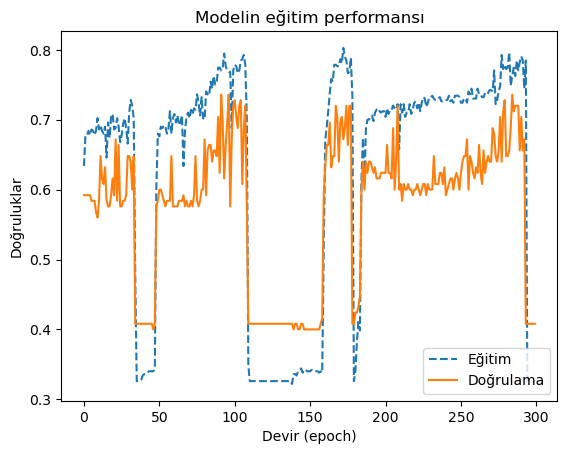

In [397]:
# Dogruluk ile ilgili grafik
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Modelin eğitim performansı")
plt.ylabel("Doğruluklar")
plt.xlabel("Devir (epoch)")
plt.legend(["Eğitim", "Doğrulama"], loc="lower right")
plt.show()

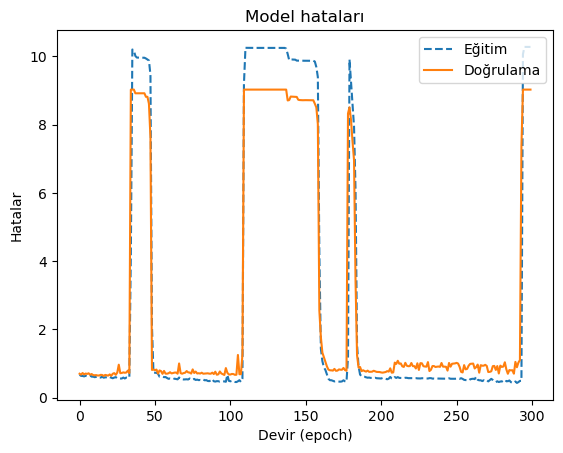

In [398]:
# Hata grafiği
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model hataları")
plt.ylabel("Hatalar")
plt.xlabel("Devir (epoch)")
plt.legend(["Eğitim", "Doğrulama"], loc="upper right")
plt.show()

In [399]:
# Test verisi ile performans ölçümü
scores = model.evaluate(X_test, y_test)
print("\nDoğruluk: ", scores[1])

9/9 [==============================] - 0s 629us/step - loss: 9.5950 - accuracy: 0.3708

Doğruluk:  0.37078651785850525
